BANKNOTE AUTHENTICATION

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('BankNote_Authentication.csv')
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [6]:
df=df.rename({'curtosis':'kurtosis'},axis=1)
df

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
df.describe()

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


<Axes: xlabel='class', ylabel='count'>

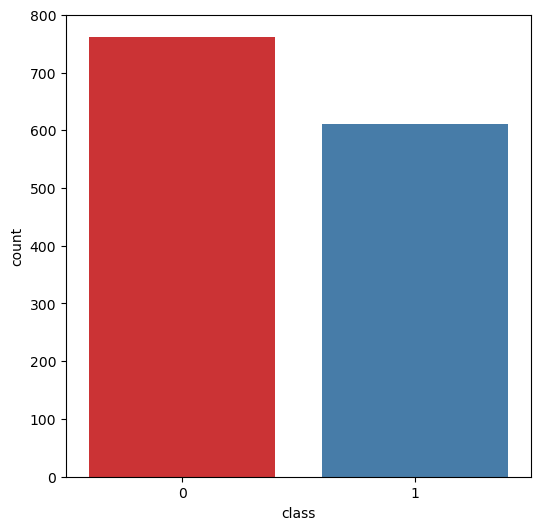

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x=df["class"],palette='Set1')

In [10]:
#Frequencies
count = df['class'].value_counts()
count

0    762
1    610
Name: class, dtype: int64

<Figure size 800x800 with 0 Axes>

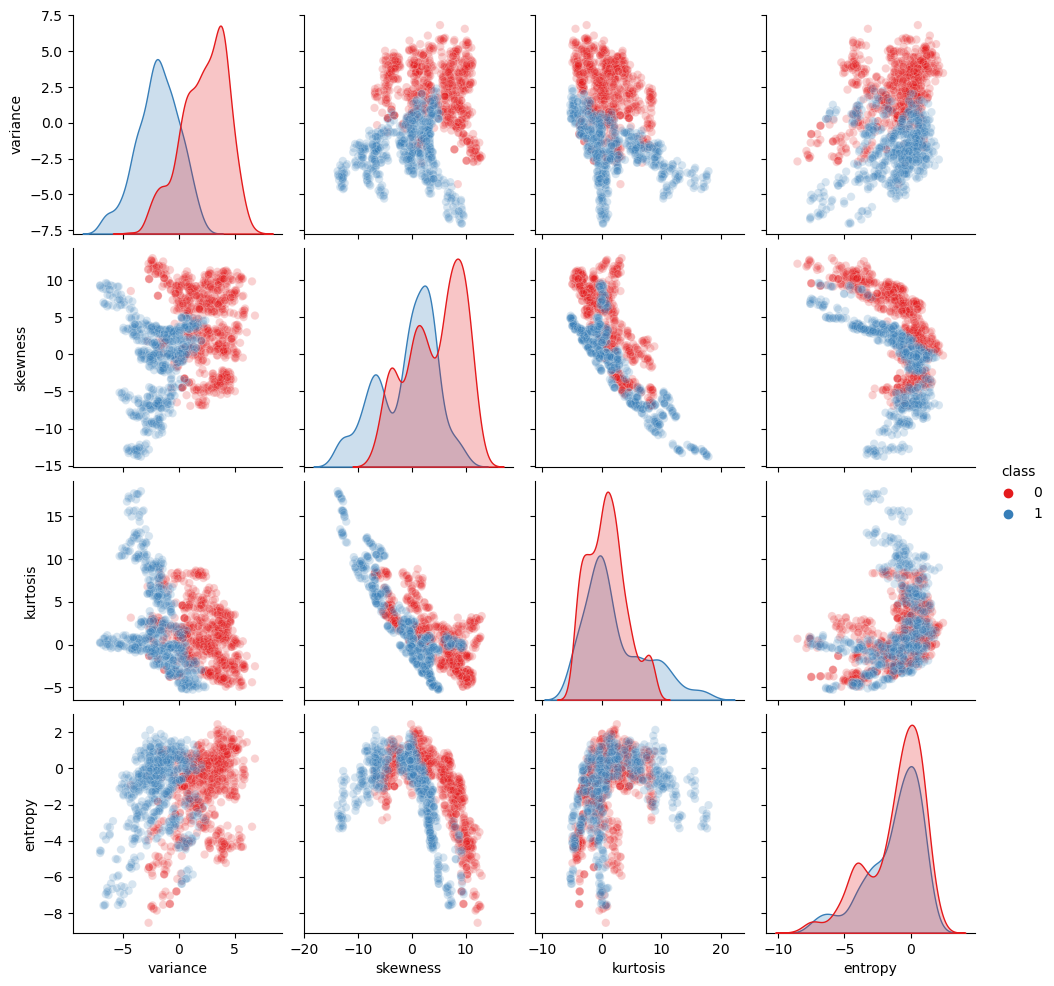

In [11]:
plt.figure(figsize=(8,8))
sns.pairplot(df,hue = "class",palette = 'Set1', plot_kws = dict(alpha=0.2))

array([[<Axes: xlabel='entropy', ylabel='entropy'>,
        <Axes: xlabel='kurtosis', ylabel='entropy'>,
        <Axes: xlabel='skewness', ylabel='entropy'>,
        <Axes: xlabel='variance', ylabel='entropy'>],
       [<Axes: xlabel='entropy', ylabel='kurtosis'>,
        <Axes: xlabel='kurtosis', ylabel='kurtosis'>,
        <Axes: xlabel='skewness', ylabel='kurtosis'>,
        <Axes: xlabel='variance', ylabel='kurtosis'>],
       [<Axes: xlabel='entropy', ylabel='skewness'>,
        <Axes: xlabel='kurtosis', ylabel='skewness'>,
        <Axes: xlabel='skewness', ylabel='skewness'>,
        <Axes: xlabel='variance', ylabel='skewness'>],
       [<Axes: xlabel='entropy', ylabel='variance'>,
        <Axes: xlabel='kurtosis', ylabel='variance'>,
        <Axes: xlabel='skewness', ylabel='variance'>,
        <Axes: xlabel='variance', ylabel='variance'>]], dtype=object)

<Figure size 1000x800 with 0 Axes>

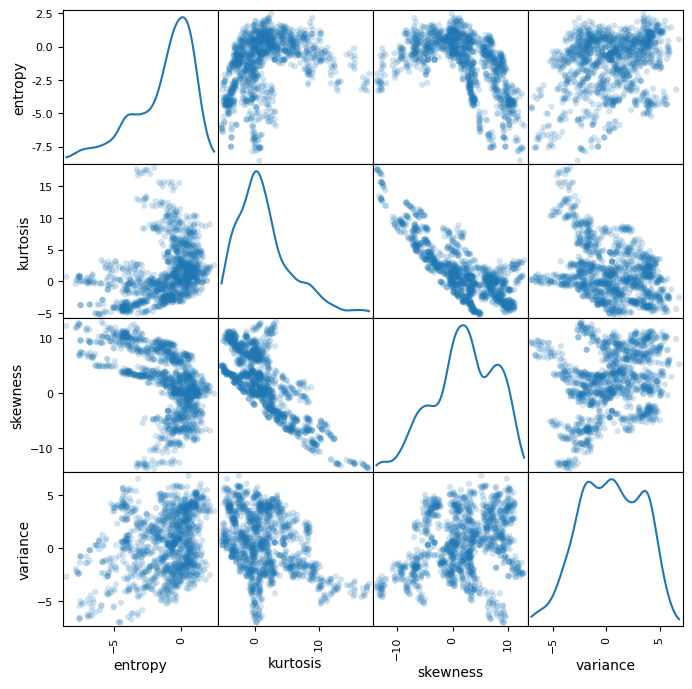

In [12]:
from pandas.plotting import scatter_matrix
columns = df.columns
columns_without_class = columns.difference(['class'])
plt.figure(figsize=(10,8))
scatter_matrix(df[columns_without_class],s = 80,alpha = 0.2,figsize = (8,8),diagonal = 'kde')

In [13]:
corr_matrix = df.corr(method = 'spearman')
corr_matrix

,variance,skewness,kurtosis,entropy,class
variance,1.000000,0.255126,-0.326704,0.241503,-0.735605
skewness,0.255126,1.000000,-0.729426,-0.572510,-0.429016
kurtosis,-0.326704,-0.729426,1.000000,0.433299,0.061600
entropy,0.241503,-0.572510,0.433299,1.000000,-0.032751
class,-0.735605,-0.429016,0.061600,-0.032751,1.000000


<Axes: >

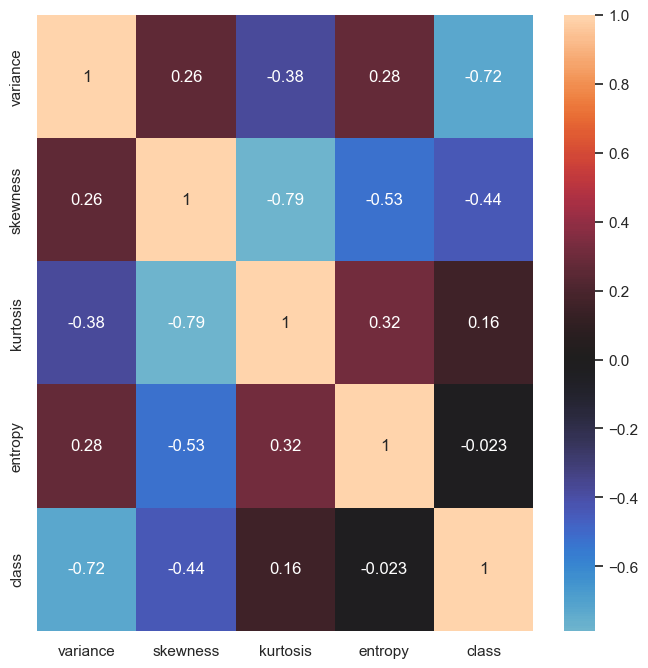

In [14]:
sns.set(rc={'figure.figsize':(8,8)})
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,center=0)

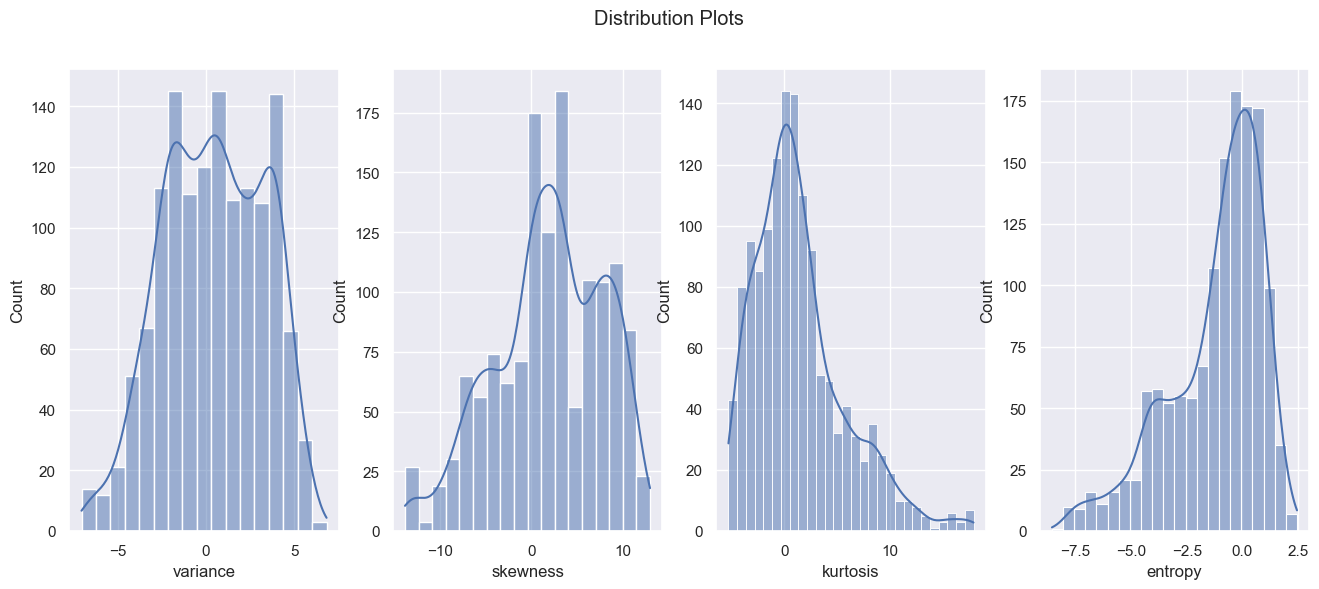

In [15]:
#check for outliers
fig,ax = plt.subplots(ncols = 4,figsize = (16,6))
fig.suptitle("Distribution Plots")

cols=list(df.columns)
cols.remove('class')

for index,col in enumerate(cols):
    sns.histplot(df[col],ax=ax[index],kde=True)

In [16]:
X = df.iloc[:, [0, 1, 2,3]].values
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [17]:
y = df.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [18]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
accuracy_dict = {}

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [22]:
predictions_l = logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,predictions_l))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       232
           1       0.96      1.00      0.98       180

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [24]:
accuracy_l = accuracy_score(y_test, predictions_l)
accuracy_l

0.9830097087378641

In [25]:
#hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model11 = LogisticRegression(penalty='none')
score11 = cross_val_score(model11,X_train,y_train,cv=5)

model12 = LogisticRegression(penalty='l2')
score12 = cross_val_score(model12,X_train,y_train,cv=5)

#average scores after cross validation
print('score11:',score11)
print('average score for penlaty=none is :',np.average(score11))
print('\n')

print('score12:',score12)
print('average score for penalty=l2 is :',np.average(score12))

score11: [0.984375   0.97916667 0.98958333 1.         0.99479167]
average score for penlaty=none is : 0.9895833333333334


score12: [0.97916667 0.96875    0.96354167 0.98958333 1.        ]
average score for penalty=l2 is : 0.9802083333333332


c:\Users\ilfas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ilfas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ilfas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ilfas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ilfas\anaconda3\lib\site-packages\sklearn\linear_model\

In [26]:
accuracy_dict[1] = ["Logistic Regression", np.average(score11)]

DECISION TREE

In [27]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
predictions_d = Dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predictions_d))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       232
           1       0.97      0.98      0.98       180

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [30]:
accuracy_d = accuracy_score(y_test, predictions_d)
#accuracy_dict[1] = ["Decision Tree", accuracy_d]
accuracy_d

0.9781553398058253

In [31]:
#hyperparameter tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model21 = DecisionTreeClassifier(random_state=0, max_depth=5)
score21 = cross_val_score(model21,X_train,y_train,cv=5)

model22 = DecisionTreeClassifier(random_state=0,max_depth=8)
score22 = cross_val_score(model22,X_train,y_train,cv=5)

model23 = DecisionTreeClassifier(random_state=0,max_depth=10)
score23 = cross_val_score(model23,X_train,y_train,cv=5)

#average scores after cross validation
print('score11:',score21)
print('average score for max_depth=5 is :',np.average(score21))
print('\n')

print('score12:',score22)
print('average score for max_depth=8 is :',np.average(score22))
print('\n')

print('score13:',score23)
print('average score for max_depth=10 is :',np.average(score23))
print('\n')


score11: [0.94791667 0.99479167 0.984375   0.98958333 0.953125  ]
average score for max_depth=5 is : 0.9739583333333333


score12: [0.96354167 0.99479167 0.984375   0.99479167 0.95833333]
average score for max_depth=8 is : 0.9791666666666666


score13: [0.96354167 0.99479167 0.984375   0.99479167 0.95833333]
average score for max_depth=10 is : 0.9791666666666666




In [32]:
accuracy_dict[2] = ["Decision Tree", np.average(score22)]

RANDOM FORESTS CLASSIFIER

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) 
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rf_pred = rf.predict(X_test)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       232
           1       0.98      0.99      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [35]:
accuracy_r = accuracy_score(y_test, rf_pred)
accuracy_r

0.9902912621359223

In [36]:
#hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier

model31 = RandomForestClassifier(n_estimators=50,min_samples_leaf=3,n_jobs=1,max_features=0.25,random_state=0)
score31 = cross_val_score(model31,X_train,y_train,cv=5)

model32 = RandomForestClassifier(n_estimators=100,min_samples_leaf=3,n_jobs=1,max_features=0.25,random_state=0)
score32 = cross_val_score(model32,X_train,y_train,cv=5)

model33 = RandomForestClassifier(n_estimators=150,min_samples_leaf=3,n_jobs=1,max_features=0.25,random_state=0)
score33 = cross_val_score(model33,X_train,y_train,cv=5)

#average scores after cross validation
print('score21:',score31)
print('average score for n_estimators=50 is :',np.average(score31))
print('\n')

print('score22:',score32)
print('average score for n_estimators=100 is :',np.average(score32))
print('\n')

print('score23:',score33)
print('average score for n_estimators=150 is :',np.average(score33))


score21: [0.984375   0.98958333 0.98958333 0.99479167 0.97916667]
average score for n_estimators=50 is : 0.9875


score22: [0.984375   0.99479167 0.98958333 1.         0.97916667]
average score for n_estimators=100 is : 0.9895833333333334


score23: [0.984375   0.99479167 0.98958333 1.         0.97916667]
average score for n_estimators=150 is : 0.9895833333333334


In [37]:
accuracy_dict[3] = ["Random Forests", np.average(score32)]

AdaBoost Classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = Ada.fit(X_train, y_train)

In [39]:
ad_pred = Ada.predict(X_test)
print(classification_report(y_test,ad_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       180

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [40]:
accuracy_d = accuracy_score(y_test, ad_pred)
accuracy_d

1.0

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

model41 = AdaBoostClassifier(n_estimators=50,learning_rate=0.1,random_state=0)
score41 = cross_val_score(model41,X_train,y_train,cv=5)

model42 = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=0)
score42 = cross_val_score(model42,X_train,y_train,cv=5)

model43 = AdaBoostClassifier(n_estimators=150,learning_rate=0.1,random_state=0)
score43 = cross_val_score(model43,X_train,y_train,cv=5)

#average scores after cross validation
print('score31:',score41)
print('average score for n_estimators=50 is :',np.average(score41))
print('\n')

print('score32:',score42)
print('average score for n_estimators=100 is :',np.average(score42))
print('\n')

print('score33:',score43)
print('average score for n_estimators=150 is :',np.average(score43))
print('\n')


score31: [0.953125   0.95833333 0.97916667 0.97916667 0.96875   ]
average score for n_estimators=50 is : 0.9677083333333332


score32: [0.95833333 0.95833333 0.97916667 0.984375   0.97395833]
average score for n_estimators=100 is : 0.9708333333333334


score33: [0.97395833 0.96875    0.98958333 0.99479167 0.98958333]
average score for n_estimators=150 is : 0.9833333333333334




In [42]:
accuracy_dict[4] = ["AdaBoost", np.average(score43)]

SVM CLASSIFIER

In [43]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [44]:
predictions_s = svc_model.predict(X_test)
print(classification_report(y_test,predictions_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       180

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [45]:
accuracy_s = accuracy_score(y_test, predictions_s)
accuracy_s

1.0

In [46]:
#hyperparameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model51 = SVC(kernel='linear',random_state=0)
score51 = cross_val_score(model51,X_train,y_train,cv=5)

model52 = SVC(kernel='sigmoid',random_state=0)
score52 = cross_val_score(model52,X_train,y_train,cv=5)

model53 = SVC(kernel='poly',random_state=0)
score53 = cross_val_score(model53,X_train,y_train,cv=5)

#average scores after cross validation
print('score41:',score51)
print('average score for kernel=linear is :',np.average(score51))
print('\n')

print('score42:',score52)
print('average score for kernel=rbf is :',np.average(score52))
print('\n')

print('score43:',score53)
print('average score for kernel=poly is :',np.average(score53))



score41: [0.97916667 0.97916667 0.96875    0.98958333 1.        ]
average score for kernel=linear is : 0.9833333333333332


score42: [0.82291667 0.80208333 0.78125    0.765625   0.77083333]
average score for kernel=rbf is : 0.7885416666666667


score43: [0.97916667 0.98958333 0.984375   1.         1.        ]
average score for kernel=poly is : 0.990625


In [47]:
accuracy_dict[5] = ["SVM", np.average(score53)]

RESULTS

In [48]:
accuracy_dict

{1: ['Logistic Regression', 0.9895833333333334],
 2: ['Decision Tree', 0.9791666666666666],
 3: ['Random Forests', 0.9895833333333334],
 4: ['AdaBoost', 0.9833333333333334],
 5: ['SVM', 0.990625]}

In [49]:
print ("{:<15} {:<25} {}".format("Sr. No.", "Algorithm", "Accuracy"))

for key, value in accuracy_dict.items():
    algorithm, accuracy = value
    print ("{:<15} {:<25} {}%".format(key, algorithm, round(accuracy*100, 2)))

Sr. No.         Algorithm                 Accuracy
1               Logistic Regression       98.96%
2               Decision Tree             97.92%
3               Random Forests            98.96%
4               AdaBoost                  98.33%
5               SVM                       99.06%


Best Model SVM (model53):

In [50]:
model53.fit(X_train,y_train)

SVC(kernel='poly', random_state=0)

In [51]:
predictions_best = model53.predict(X_test)
print(classification_report(y_test,predictions_best))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       232
           1       0.95      1.00      0.98       180

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [52]:
accuracy_test = model53.score(X_test, y_test)
print("\nAccuracy on Test Set:", accuracy_test)



Accuracy on Test Set: 0.9781553398058253


In [59]:
cf = confusion_matrix(y_test,predictions_best)
print(cf)

[[223   9]
 [  0 180]]


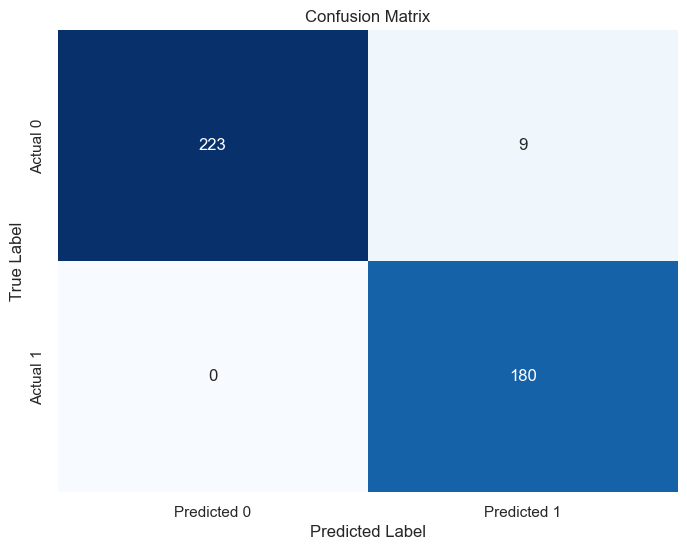

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [54]:
#saving the model
import pickle
model_filename = 'trained_model.pkl'

In [55]:
with open(model_filename, 'wb') as file:
    pickle.dump(model53, file)

In [56]:
data = {'variance': [-2.1802],
        'skewness': [3.3791],
        'curtosis': [-1.2256],
        'entropy': [-2.6621],
        'class': [1]}  # Assuming binary class labels (1 or 0)

banknote_example = pd.DataFrame(data)

predicted_class = model53.predict(banknote_example[['variance', 'skewness', 'curtosis', 'entropy']])
print("Predicted Class:", predicted_class)

Predicted Class: [0]


c:\Users\ilfas\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [57]:
X_test

array([[-0.77491408, -2.19276019,  2.08404846,  0.08591101],
       [ 1.67809087, -0.33505371, -0.24999944,  1.09806281],
       [-0.86147317,  0.30840173, -0.78433999, -1.29305867],
       ...,
       [-0.65637503, -0.57748016,  0.17193106,  0.76642717],
       [-0.46321253,  0.2239043 , -0.75682853, -0.8409954 ],
       [ 2.27956282,  0.57338414, -0.9268522 ,  0.82632818]])

In [58]:
y_test

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,